<a href="https://colab.research.google.com/github/madisonhgallagher/kmc/blob/main/kNN_model_build.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df = pd.read_csv('clean_train.csv')
df.shape

(3156, 34)

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
model = KNeighborsClassifier(n_neighbors=5)

In [53]:
# Maxmin normalization function:
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

# Apply maxmin to each column of X to get U:
X = X.apply(maxmin)
print(X.head())
print(X.describe())

   cigsPerDay       age   totChol
0    0.000000  0.684211  0.191851
1    0.214286  0.210526  0.156197
2    0.000000  0.526316  0.285229
3    0.614286  0.157895  0.106961
4    0.000000  0.289474  0.161290
        cigsPerDay          age      totChol
count  3156.000000  3156.000000  3156.000000
mean      0.128150     0.463978     0.219929
std       0.171624     0.225473     0.075689
min       0.000000     0.000000     0.000000
25%       0.000000     0.263158     0.168081
50%       0.000000     0.447368     0.215620
75%       0.285714     0.631579     0.263158
max       1.000000     1.000000     1.000000


In [62]:
y = df['TenYearCHD'] # Create target variable vector
X = df.loc[:,['cigsPerDay','age','totChol']] # Create feature matrix
X = X.apply(maxmin) # Normalize X

# Split the sample:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=100) # For replication purposes

In [63]:
k_bar = 100 # Number of k's to try
SSE = np.zeros(k_bar) # We'll store the SSE here
SSE_on_train = np.zeros(k_bar) # For pedogogical purposes, we'll save the training error

for k in range(k_bar):
    model = KNeighborsRegressor(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test) # Predict values for test set
    SSE[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE for test set
    y_hat = fitted_model.predict(X_train) # Predict values for training set
    SSE_on_train[k] = np.sum( (y_train-y_hat)**2 ) # Save the computed SSE

SSE_min = np.min(SSE) # Find lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find the indices of SSE that equal the minimum
k_star = min_index[0]+1 # Find the optimal value of k; why index+1?
print(k_star)


[41]


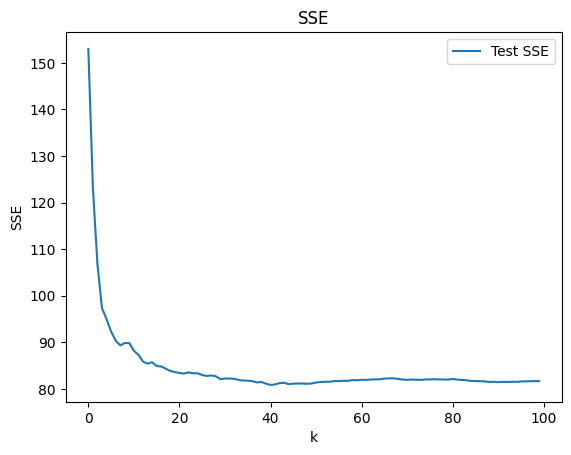

In [64]:
plt.plot(np.arange(0,k_bar),SSE,label='Test SSE') # Plot SSE by k
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='upper right')
plt.title('SSE')
plt.show()


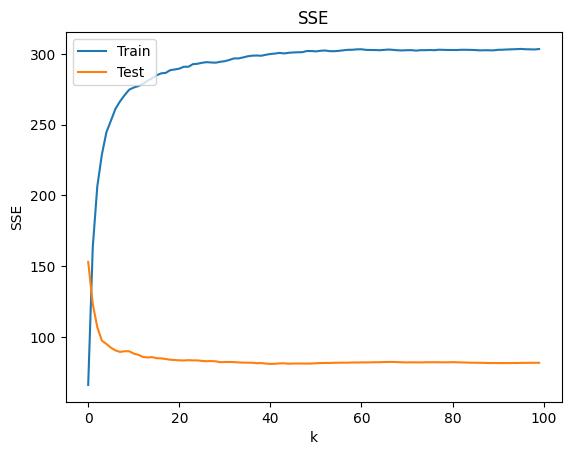

In [65]:
plt.plot(np.arange(0,k_bar),SSE_on_train,label='Train') # Plot SSE by k
plt.plot(np.arange(0,k_bar),SSE,label='Test') # Plot SSE by k
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='upper left')
plt.title('SSE')
plt.show()

New attempt

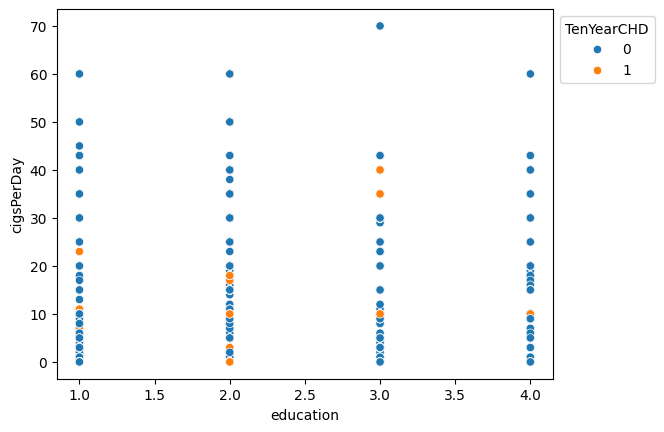

In [132]:
this_plot = sns.scatterplot(data=df,x='education',y='cigsPerDay',hue='TenYearCHD')
sns.move_legend(this_plot, "upper left", bbox_to_anchor=(1, 1)) # Move legend off the plot canvas

In [76]:
from sklearn.neighbors import KNeighborsClassifier

# Select features/target variable for analysis:
y = df['TenYearCHD']
X = df.loc[:,['totChol','BMI','age','cigsPerDay']] # Create feature matrix

# Max-min normalize the features:
X = X.apply(maxmin)

# Fit the model:
model = KNeighborsClassifier(n_neighbors=3) # Create a sk model for k=3
classifier_model = model.fit(X,y) # Train the model on our data

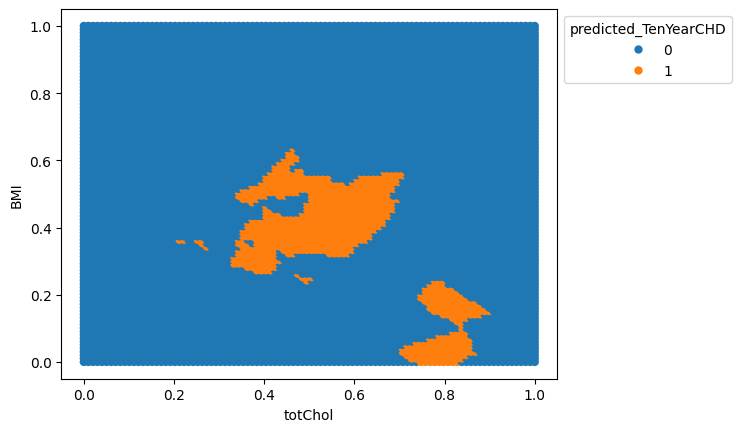

In [83]:
# Graph of predictor:
N_x = 100 # Coarseness of x variable
N_y = 100 # Coarseness of y variable
total = N_x*N_y # Total number of points to plot
grid_x = np.linspace(0,1,N_x) # Create a grid of x values
grid_y = np.linspace(0,1,N_y) # Create a grid of y values
xs, ys = np.meshgrid(grid_x,grid_y) # Explode grids to all possible pairs
X = xs.reshape(total) # Turns pairs into vectors
Y = ys.reshape(total) # Turns pairs into vectors
x_hat = pd.DataFrame({'totChol':X,'BMI':Y,'age':X,'cigsPerDay':Y}) # Create a dataframe of points to plot
y_hat = classifier_model.predict(x_hat) # Fit the model to the points
x_hat['predicted_TenYearCHD'] = y_hat # Add new variable to the dataframe
# Create seaborn plot:
this_plot = sns.scatterplot(data=x_hat,x='totChol',y='BMI',hue='predicted_TenYearCHD', linewidth=0)
sns.move_legend(this_plot, "upper left", bbox_to_anchor=(1, 1)) # Move legend off the plot canvas

## attempt 3

In [134]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

## Select data:
y = df['TenYearCHD'] # Target variable
X = df.loc[:,['education','education','sysBP']] # Create feature matrix
X = X.apply(maxmin) # Normalize X

In [135]:
## Split the sample:
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.5, # Split the sample 80 train/ 20 test
                                                    random_state=200) # For replication purposes
N_train = len(y_train)
N_test = len(y_test)

In [136]:
## Solve for k that maximizes accuracy:
k_bar = 100 # Number of k's to try
Acc = np.zeros(k_bar) # We'll store the accuracy here

for k in range(k_bar):
    model = KNeighborsClassifier(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train.values,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test.values) # Predict values for test set
    Acc[k] = np.sum( y_hat == y_test )/N_test # Accuracy on testing data

Acc_max = np.max(Acc) # Find highest recorded Accuracy
max_index = np.where(Acc==Acc_max) # Find the indices that equal the maximum
k_star = max_index[0]+1 # Find the optimal value of k; why index+1?
print(k_star)

[ 14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31
  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49
  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100]


In [137]:
## Fit optimal model:
model = KNeighborsClassifier(n_neighbors=k_star[0]) # Create a sk model for k
fitted_model = model.fit(X_train.values,y_train) # Train the model on our data
y_hat = fitted_model.predict(X_test.values) # Predict values for test set

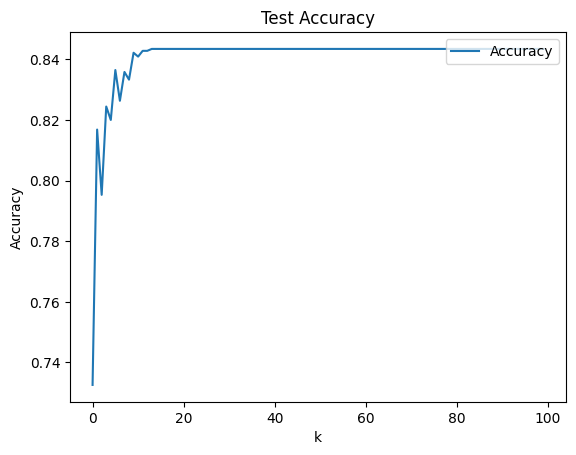

In [138]:
## Accuracy plot:
plt.plot(np.arange(0,k_bar),Acc,label='Accuracy')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.legend(loc='upper right')
plt.title('Test Accuracy')
plt.show()

In [139]:
## Confusion matrix:
pd.crosstab(y_test,y_hat)

col_0,0
TenYearCHD,
0,1331
1,247


In [145]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Selecting the predictors and the target
X = df1[['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]
Y = df1['TenYearCHD']

# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creating the kNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)

# Making predictions
Y_pred = knn.predict(X_test)

# Evaluating the model
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[519  15]
 [ 85  13]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       534
           1       0.46      0.13      0.21        98

    accuracy                           0.84       632
   macro avg       0.66      0.55      0.56       632
weighted avg       0.80      0.84      0.80       632

